# Introduction to Scikit-Learn (sklearn)

This notebook demonstrates some of the most useful functions of the beautiful Scikit-Learn library

What we're are going to cover:

0. An end-to-end Scikit-Learn Workflow
1. Getting the data ready
2. Choose the right estimator/algorithm for our problems
3. Fit the model/algorithm and use it to make prdiciotn on our data
4. Evaluating a model
5. Improve a model
6. Save and load a trained model
7. Putting it all together

In [1]:
# Standard imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 0. An end-to-end Scikit-Learn workflow

In [2]:
# 1. Get the data ready
import pandas as pd
heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
# Create X (features matrix)
X = heart_disease.drop("target", axis=1)

# Create y (labels)
y = heart_disease["target"]

In [4]:
# 2. Choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

# We'll keep the defaul hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [5]:
# 3. Fit the model to the training data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [6]:
clf.fit(X_train, y_train);

In [7]:
# Make a prediction
y_label = clf.predict(np.array([0, 2, 3, 4]))

D:\Projects\ML\sample_project_1\env\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[0. 2. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [8]:
y_preds = clf.predict(X_test)
y_preds

array([1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0], dtype=int64)

In [9]:
y_test

109    1
47     1
202    0
30     1
159    1
      ..
68     1
116    1
21     1
236    0
223    0
Name: target, Length: 61, dtype: int64

In [10]:
# 4. Evaluate the model on the training data and test data
clf.score(X_train, y_train)

1.0

In [11]:
clf.score(X_test, y_test)

0.7704918032786885

In [12]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.71      0.81      0.76        27
           1       0.83      0.74      0.78        34

    accuracy                           0.77        61
   macro avg       0.77      0.78      0.77        61
weighted avg       0.78      0.77      0.77        61



In [13]:
confusion_matrix(y_test, y_preds)

array([[22,  5],
       [ 9, 25]], dtype=int64)

In [14]:
accuracy_score(y_test, y_preds)

0.7704918032786885

In [15]:
# 5. Improve a model
# Try different amount of n_estimators
np.random.seed(42)
for i in range(10, 100, 10):
    print(f"Trying model with {i} estimators...")
    clf = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    print(f"Model accuracy on test set: {clf.score(X_test, y_test) * 100:.2f}%")
    print("")

Trying model with 10 estimators...
Model accuracy on test set: 78.69%

Trying model with 20 estimators...
Model accuracy on test set: 77.05%

Trying model with 30 estimators...
Model accuracy on test set: 78.69%

Trying model with 40 estimators...
Model accuracy on test set: 77.05%

Trying model with 50 estimators...
Model accuracy on test set: 77.05%

Trying model with 60 estimators...
Model accuracy on test set: 77.05%

Trying model with 70 estimators...
Model accuracy on test set: 77.05%

Trying model with 80 estimators...
Model accuracy on test set: 77.05%

Trying model with 90 estimators...
Model accuracy on test set: 78.69%



In [16]:
# 6. Save a model and load it
import pickle

pickle.dump(clf, open("random_forest_model_1.pkl", "wb"))

In [17]:
loaded_model = pickle.load(open("random_forest_model_1.pkl", "rb"))
loaded_model.score(X_test, y_test)

0.7868852459016393

## 1. Getting our data ready to be used with machine learning

Three main things we have to do:

1. Split the data into features and labels (usually `X` & `y`)
2. Filling (also called imputing) or disregarding missing values
3. Converting non-numerical values to numerical values (also called feature enconding)

In [18]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [19]:
X = heart_disease.drop("target", axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [20]:
y = heart_disease["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [21]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [22]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [23]:
X.shape[0] * 0.8

242.4

In [24]:
242 + 61

303

In [25]:
len(heart_disease)

303

## 1.1 Making sure it is all numerical

In [26]:
car_sales = pd.read_csv("data/car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [27]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [28]:
len(car_sales)

1000

In [29]:
# Split into X/y
X = car_sales.drop("Price", axis=1)
y = car_sales["Price"]

# Split into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [30]:
# Build machine learning model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

ValueError: could not convert string to float: 'Toyota'

In [ ]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")
transformed_X = transformer.fit_transform(X)
transformed_X

In [31]:
pd.DataFrame(transformed_X)

NameError: name 'transformed_X' is not defined

In [32]:
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [33]:
# Let's refit the model
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)
model.fit(X_train, y_train)

NameError: name 'transformed_X' is not defined

In [34]:
model.score(X_test, y_test)

ValueError: could not convert string to float: 'Honda'

## 1.2 What if there were missing values?

1. Fill them with some value (also know as imputation).
2. Remove the samples with missing data altogether.

In [35]:
# Impor car sales missing data
car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [36]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [37]:
# Create X & y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [38]:
# Let's try and convert our data to numbers
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  categorical_features)],
                                  remainder="passthrough")
transformed_X = transformer.fit_transform(X)
transformed_X

<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

# Option 1: Fill missing data with Pandas


In [39]:
# Fill the "Make" Column
car_sales_missing["Make"].fillna("missing", inplace=True)

# Fill the "Colour" column
car_sales_missing["Colour"].fillna("missing", inplace=True)

# Fill the "Odometer (KM)" column
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace=True)

# Fill the "Doors" column
car_sales_missing["Doors"].fillna(4, inplace=True)

In [40]:
# Check our dataframe again
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [41]:
# Remove rows with missing Price value
car_sales_missing.dropna(inplace=True)

In [42]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [43]:
len(car_sales_missing)

950

In [44]:
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [45]:
# Let's try  and convert our data to numbers
# turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features)],
                                   remainder="passthrough")

transformed_X = transformer.fit_transform(car_sales_missing)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

# Option 2: Fill missing data with Scikit-Learn

In [46]:
car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [47]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [48]:
# Drop the rows with no labels
car_sales_missing.dropna(subset=["Price"], inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [49]:
# Split into X & y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [50]:
# Fill missing values with Scikit-Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill cateforical values with 'missing' & numerical values with mean
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

# Define columns
cat_features = ["Make", "Colour"]
door_feature = ["Doors"]
num_features = ["Odometer (KM)"]

# Create an imputer (something that fills missing data)
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_feature),
    ("num_imputer", num_imputer, num_features)
])

# Transform the data
filled_X = imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [51]:
car_sales_filled = pd.DataFrame(filled_X,
                                columns=["Make", "Colour", "Doors", "Odometer (KM)"])
car_sales_filled.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0


In [52]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [53]:
# Let's try  and convert our data to numbers
# turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features)],
                                   remainder="passthrough")

transformed_X = transformer.fit_transform(car_sales_filled)
transformed_X.toarray()

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [54]:
transformed_X.shape

(950, 15)

In [55]:
# Now we've transformed X, let's see if we can fit a model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

# Make sure to use transformed (filled and one-hot encoded X data)
model.fit(X_train, y_train)
model.score(X_test, y_test)

ValueError: could not convert string to float: 'Toyota'

In [56]:
len(car_sales_filled), len(car_sales)

(950, 1000)

## 2. Choosing the right estimator/algorithm for your problem

Some thins to note:

* Sklearn refers to machine learning  models, algorithms as estimators.
* Classification problem - predicting a category (heart disease or not)
    * Sometimes you'll see `clf`(short for classifier) used as a classification estimator
* Regression problem - predicting a number (selling price of a car)

if you're working on a machine learning prooblem and looking to use Sklearn and not sure what model you should use, refer to the sklearn machine learning map: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

# 2.1 Picking a machine learning model for a regression problem

Let's use the California Housing dataset.

In [57]:
# get California Housing dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing;

In [58]:
housing_df = pd.DataFrame(housing["data"], columns=housing["feature_names"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [59]:
housing_df["target"]  = housing["target"]
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [60]:
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [61]:
# Import algorithm
from sklearn.linear_model import Ridge

# Setup random seed
np.random.seed(42)

# Create the data 
X = housing_df.drop("target", axis=1)
y = housing_df["target"] # median house in $ 100,000s

# Splpit into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiante and fit the model (on the training set)
model = Ridge()
model.fit(X_train, y_train)

# Check the score of the model (on the test set)
model.score(X_test, y_test)

0.5758549611440131

What if `Ridge` didn't wwork or the scoore didn't fit our needs?

Well, we could always try a different model, in this case, we are using an ensemble model

Sklearn's ensemble models can be found here: https://scikit-learn.org/stable/modules/ensemble.html

In [62]:
# Import the RandomForestRegressor model class from the ensembl module
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Create the data 
X = housing_df.drop("target", axis=1)
y = housing_df["target"] # median house in $ 100,000s

# Splpit into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiante and fit the model (on the training set)
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Check the score of the model (on the test set)
model.score(X_test, y_test)

0.8065734772187598

## 2.2 Choosing an estimator for a classification problem

Let's go to the map... https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [63]:
heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [64]:
len(heart_disease)

303

Consulting the map and it says to tray `LinearSVC`

In [65]:
# Import the LinearSVC estimator class
from sklearn.svm import LinearSVC

# Setup random seed
np.random.seed(42)

# Make the data 
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate LinearSVC
clf = LinearSVC(max_iter=10000)
clf.fit(X_train, y_train)

# Evaluate the LinearSVC
clf.score(X_test, y_test)

D:\Projects\ML\sample_project_1\env\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8688524590163934

In [66]:
heart_disease["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [67]:
# Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Evaluate the RandomForestClassifier
clf.score(X_test, y_test)

0.8524590163934426

Tidbit:

1. If you have structured data, use ensemble methods
2. If you have unstructured data, use deep learning or trasnfer learning

In [68]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# 3. Fit the model/algorithm on our data and use it to make predictions

## 3.1 Fitting the model to the data

Different names for:
* `X` = features, features variables, data
* `y` = labels, targets, target variables

In [69]:
# Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier()

#Fit the mkodel to the data(training the machine learning model)
clf.fit(X_train, y_train)

# Evaluate the RandomForestClassifier(use the paterns the model has learned)
clf.score(X_test, y_test)

0.8524590163934426

## 3.2 Make predictions using a machine learning model

2 ways to make predictions:
1. `predict()`
2. `predict_proba()`

In [70]:
# Use a trained model to make predictions
clf.predict(np.array([1, 7, 8, 3, 4])) # this doesn't work

D:\Projects\ML\sample_project_1\env\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[1. 7. 8. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [71]:
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [72]:
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [73]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [74]:
# Compare predictions to truth labels to evaluate the model
y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)

0.8524590163934426

In [75]:
clf.score(X_test, y_test)

0.8524590163934426

In [76]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8524590163934426

Make predictions with `predict_proba()`

In [77]:
# predict_proba returns probabilities of a classification label
clf.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [78]:
# Let's predict() on the same data
clf.predict(X_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

In [79]:
heart_disease["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

`predict()` can also be used for regression models.

In [80]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [81]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create the data
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split into training and test setes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create model instance
model = RandomForestRegressor()

# Fit the model to the data
model.fit(X_train, y_train)

# Make predictions
y_preds = model.predict(X_test)

In [82]:
y_preds[:10]

array([0.49384  , 0.75494  , 4.9285964, 2.54316  , 2.33176  , 1.6525301,
       2.34323  , 1.66182  , 2.47489  , 4.8344779])

In [83]:
y_test[:10]

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
13311    1.58700
7113     1.98200
7668     1.57500
18246    3.40000
5723     4.46600
Name: target, dtype: float64

In [84]:
np.array(y_test[:10])

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  ])

In [85]:
# Compare the predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

0.32659871732073664

In [86]:
housing_df["target"]

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: target, Length: 20640, dtype: float64

# 4. Evaluating a machine learning model

Three ways to evaluate Scikit-Learn models/estimators:
1. Estimator's built-in `score()` method
2. The `scoring` parameter
3. Problem-specificmetric functions

You can read more about these here: https://scikit-learn.org/stable/modules/model_evaluation.html

### 4.1 Evaluating a model with the `score()` method

In [87]:
from sklearn.ensemble import RandomForestClassifier

# Setup a random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier()

# Fit the model to the data (training the machine learning model)
clf.fit(X_train, y_train)

RandomForestClassifier()

In [88]:
# The highest value for the score() method is 1.0, the lowest is 0.0
clf.score(X_train, y_train)

1.0

In [89]:
clf.score(X_test, y_test)

0.8524590163934426

Let´s use the `score()`on our regression problem

In [90]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create the data
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create model instance
model = RandomForestRegressor(n_estimators=50)

# Fit the model to the data
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=50)

In [91]:
# The default score() evaluation metric is r_squared for regression algorithms
# Highest =1.0, lowest = 0.0
model.score(X_test, y_test)

0.8040661003828089

In [92]:
y_test.mean()

2.0550030959302323

## 4.2 Evaluating a model using the `scoring` parameter

In [93]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()

clf.fit(X_train, y_train)

RandomForestClassifier()

In [94]:
clf.score(X_test, y_test)

0.8524590163934426

In [95]:
cross_val_score(clf, X, y, cv=5)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [96]:
np.random.seed(42)

# Single training and test split score
clf_single_score = clf.score(X_test, y_test)

# Take the mean of 5-fold cross-validation score
clf_cross_val_score = np.mean(cross_val_score(clf, X, y, cv=5))

# Compare the two
clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

In [97]:
# Default scoring parameter of classifier = mean accuracy
clf.score()

TypeError: ClassifierMixin.score() missing 2 required positional arguments: 'X' and 'y'

In [ ]:
# Scoring parameter set to None by default
cross_val_score(clf, X, y, cv=5, scoring=None)

### 4.2.1 Classification model evaluation metrics
1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

#### Accuracy

In [98]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]



clf = RandomForestClassifier(n_estimators=100)
cross_val_score(clf, X, y, cv=5)

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [99]:
print(f"Heart Disease Classifier Cross-Validated Accuracy: {np.mean(cross_val_score(clf, X, y, cv=5)) * 100:.2f}%")

Heart Disease Classifier Cross-Validated Accuracy: 80.18%


**Area under the receiver operating characteristic curve (AUC/ROC)**

* Area under curve (AUC)
* ROC curve

ROC curves are a comparison of a model's true positive rate (tpr) versus a model's false positive rate (fpr).

* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1

In [100]:
# Create X_test... etc
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [101]:
from sklearn.metrics import roc_curve

# Fit the classifier
clf.fit(X_train, y_train)

# Make predictions with probabilities
y_probs = clf.predict_proba(X_test)
y_probs[:10], len(y_probs)

(array([[0.11, 0.89],
        [0.53, 0.47],
        [0.09, 0.91],
        [0.39, 0.61],
        [0.23, 0.77],
        [0.01, 0.99],
        [0.61, 0.39],
        [0.45, 0.55],
        [0.11, 0.89],
        [0.87, 0.13]]),
 61)

In [102]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.89, 0.47, 0.91, 0.61, 0.77, 0.99, 0.39, 0.55, 0.89, 0.13])

In [103]:
# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# Check the false positive rates
fpr

array([0.     , 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.0625 ,
       0.09375, 0.15625, 0.15625, 0.1875 , 0.1875 , 0.21875, 0.21875,
       0.3125 , 0.34375, 0.34375, 0.40625, 0.59375, 0.65625, 0.75   ,
       0.9375 , 1.     ])

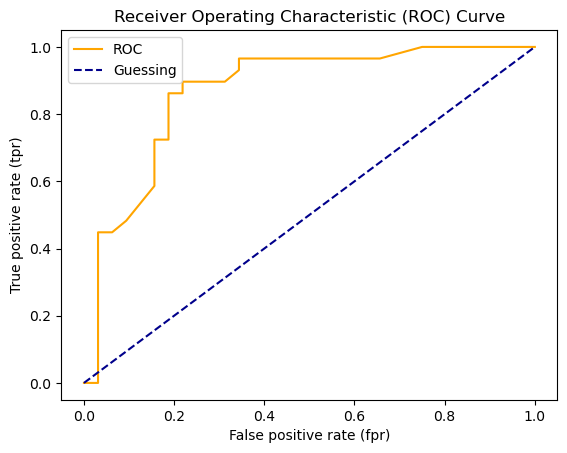

In [104]:
# Create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (fpr)
    and true positive rate (tpr) of a model.
    """
    # Plot roc curve
    plt.plot(fpr, tpr, color="orange", label="ROC")
    # Plot line with no predictive power (baseline)
    plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--", label="Guessing")
    
    # Customize the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr)

In [105]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.8679956896551724

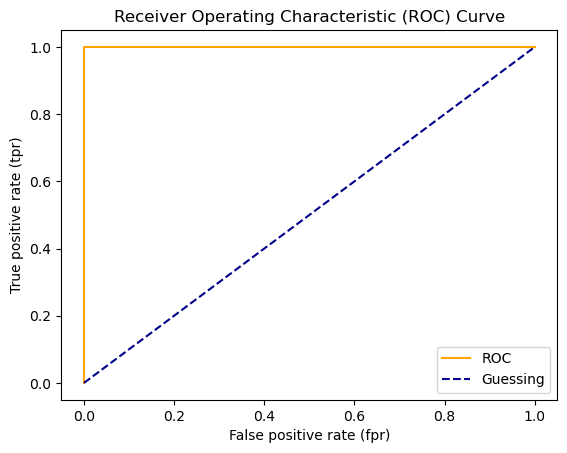

In [106]:
# Plot perfect ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [107]:
# Perfect AUC score
roc_auc_score(y_test, y_test)

1.0

**Confusion Matrix**

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict.

In essence, giving you an idea of where the model is getting confused.

In [108]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[24,  8],
       [ 3, 26]], dtype=int64)

In [109]:
# Visualize confusion matrix with pd.crosstab()
pd.crosstab(y_test,
            y_preds,
            rownames=["Actual Labels"],
            colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,24,8
1,3,26


In [110]:
len(X_test)

61

In [111]:
# How install a conda package from a Jupyter Notebook
import sys 
!conda install --yes --prefix {sys.prefix} seaborn

Solving environment: ...working... done

# All requested packages already installed.





==> WARNING: A newer version of conda exists. <==
  current version: 23.3.1
  latest version: 23.5.2

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.5.2




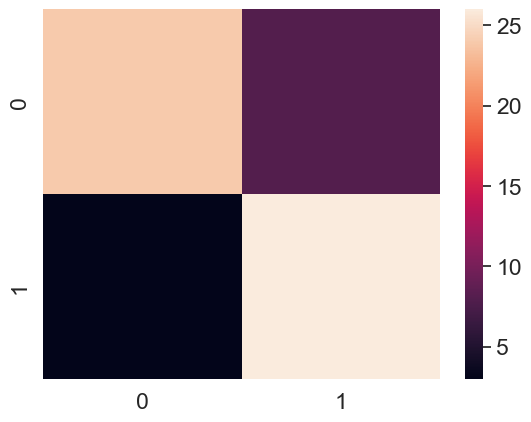

In [112]:
# Make our confusion matrix more visual with Seaborn's heatmap()
import seaborn as sns

# Set the font scale
sns.set(font_scale=1.5)

# Create a confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

# Plot it using Seaborn
sns.heatmap(conf_mat);

**Creating a confusion matrix using Scikit-Learn**

To use the new methods of creating a confusion matrix with Scikit-Learn you will need sklean version 1.0+ - https://scikit-learn.org/stable/install.html

In [113]:
import sklearn
sklearn.__version__

'1.2.2'

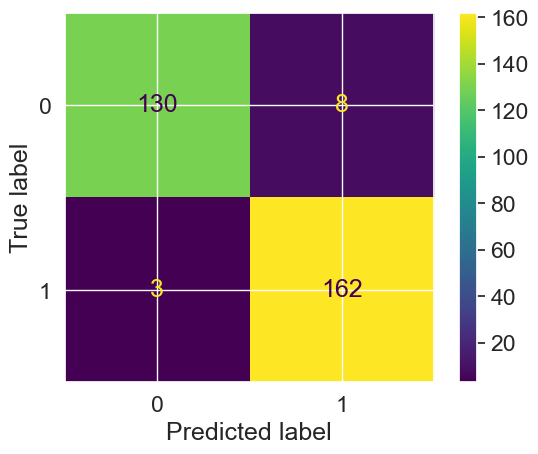

In [114]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=clf, X=X, y=y)

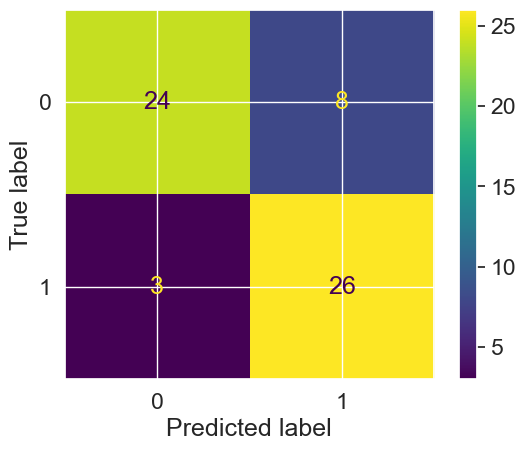

In [115]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test,
                                        y_pred=y_preds);

**Classification Report**

In [116]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.75      0.81        32
           1       0.76      0.90      0.83        29

    accuracy                           0.82        61
   macro avg       0.83      0.82      0.82        61
weighted avg       0.83      0.82      0.82        61



In [117]:
# Where precision and recall become valuable
disease_true = np.zeros(10000)
disease_true[0] = 1 #only one positive case

disease_preds = np.zeros(10000) # model ppredicts every case as 0

pd.DataFrame(classification_report(disease_true,
                                   disease_preds,
                                   output_dict=True))

D:\Projects\ML\sample_project_1\env\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Projects\ML\sample_project_1\env\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Projects\ML\sample_project_1\env\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


### 4.2.2 Regression model evaluation metrics

Model evaluation metrics documentation - https://scikit-learn.org/stable/modules/model_evaluation.html
    
The ones we're going to cover are:
1. R^2 (pronouced r-squared) or coeffcient of determination
2. Mean absolute error (MAE)
3. Mean squared error (MSE)

**R2**


What R-square does: Compares your models predictions to the mean of the targets.Values can range from negative infinity (a very poor model) to 1. For example, if all your model does is predict the mean of the targets, it's R^2 value would be 0. And if your model perfectly predicts a range of numbers it's R^2 value would be 1.

In [118]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("target", axis=1)
y = housing_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [119]:
model.score(X_test, y_test)

0.8065734772187598

In [120]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [121]:
y_test

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
15362    2.63300
16623    2.66800
18086    5.00001
2144     0.72300
3665     1.51500
Name: target, Length: 4128, dtype: float64

In [122]:
y_test.mean()

2.0550030959302323

In [123]:
from sklearn.metrics import r2_score

# Fill an array with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())

In [124]:
y_test_mean[:10]

array([2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031,
       2.0550031, 2.0550031, 2.0550031, 2.0550031])

In [125]:
r2_score(y_true=y_test,
         y_pred=y_test_mean)

0.0

In [126]:
r2_score(y_true=y_test,
         y_pred=y_test)

1.0

**Mean absolute error (MAE)**

MAE is the average of the absolute differences between predictions and actual values.

It gives you an idea of how wrong your models predictions are

In [127]:
# MAE
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mae

0.32659871732073664

In [128]:
df = pd.DataFrame(data={"actual values": y_test,
                        "predicted values": y_preds})
df["differences"] = df["predicted values"] - df["actual values"]
df.head(10)

,actual values,predicted values,differences
20046,0.47700,0.493840,0.016840
3024,0.45800,0.754940,0.296940
15663,5.00001,4.928596,-0.071414
20484,2.18600,2.543160,0.357160
9814,2.78000,2.331760,-0.448240
13311,1.58700,1.652530,0.065530
7113,1.98200,2.343230,0.361230
7668,1.57500,1.661820,0.086820
18246,3.40000,2.474890,-0.925110
5723,4.46600,4.834478,0.368478


In [129]:
y_test

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
15362    2.63300
16623    2.66800
18086    5.00001
2144     0.72300
3665     1.51500
Name: target, Length: 4128, dtype: float64

In [130]:
df["differences"].mean()

0.012048392126937589

In [131]:
# MAE using formulas and differences
np.abs(df["differences"]).mean()

0.32659871732073664

**Mean squared error (MSE)**

MSE is the mean of the square of the errors between actual and predicted values.

In [132]:
# Mean Squared Error
from sklearn.metrics import mean_squared_error

y_preds = model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
mse

0.2534678520824551

In [133]:
df = pd.DataFrame(data={"actual values": y_test,
                        "predicted values": y_preds})
df["differences"] = df["predicted values"] - df["actual values"]
df["squared differences"] = np.square(df["differences"])
df.head(10)

,actual values,predicted values,differences,squared differences
20046,0.47700,0.493840,0.016840,0.000284
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.543160,0.357160,0.127563
9814,2.78000,2.331760,-0.448240,0.200919
13311,1.58700,1.652530,0.065530,0.004294
7113,1.98200,2.343230,0.361230,0.130487
7668,1.57500,1.661820,0.086820,0.007538
18246,3.40000,2.474890,-0.925110,0.855829
5723,4.46600,4.834478,0.368478,0.135776


In [134]:
# Calculate MSE by hand
squared = np.square(df["differences"])
squared.mean()

0.2534678520824551

In [135]:
df_large_error = df.copy()
df_large_error.iloc[0]["squared differences"] = 16

In [136]:
df_large_error.head()

,actual values,predicted values,differences,squared differences
20046,0.47700,0.493840,0.016840,16.000000
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.543160,0.357160,0.127563
9814,2.78000,2.331760,-0.448240,0.200919


In [137]:
# calculate MSE with large error
df_large_error["squared differences"].mean()

0.2573437523766412

In [138]:
df_large_error.iloc[1:100] = 20
df_large_error

,actual values,predicted values,differences,squared differences
20046,0.47700,0.493840,0.016840,16.000000
3024,20.00000,20.000000,20.000000,20.000000
15663,20.00000,20.000000,20.000000,20.000000
20484,20.00000,20.000000,20.000000,20.000000
9814,20.00000,20.000000,20.000000,20.000000
...,...,...,...,...
15362,2.63300,2.220380,-0.412620,0.170255
16623,2.66800,1.947760,-0.720240,0.518746
18086,5.00001,4.836378,-0.163632,0.026775
2144,0.72300,0.717820,-0.005180,0.000027


In [139]:
# Calculate MSE with large error
df_large_error["squared differences"].mean()

0.7334180712088106

### 4.2.3 Finally using the `scoring` parameter

In [140]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier(n_estimators=100)

In [141]:
np.random.seed(42)

# Cross-validation accuracy
cv_acc = cross_val_score(clf, X, y, cv=5, scoring=None) # if score=None, estimator's default scoring evaluation metric is used (accuracy for classification models)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [142]:
# Cross-validated accuracy
print(f"The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

The cross-validated accuracy is: 82.48%


In [143]:
np.random.seed(42)

cv_acc = cross_val_score(clf, X, y, cv=5, scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [144]:
# Cross-validated accuracy
print(f"The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

The cross-validated accuracy is: 82.48%


In [145]:
# Precision 

np.random.seed(42)

cv_precision = cross_val_score(clf, X, y, cv=5, scoring="precision")
cv_precision

array([0.82352941, 0.93548387, 0.84848485, 0.79411765, 0.76315789])

In [146]:
# Cross-validated accuracy
print(f"The cross-validated precision is: {np.mean(cv_precision)}") 

The cross-validated precision is: 0.8329547346025924


In [147]:
# Recall

np.random.seed(42)

cv_recall = cross_val_score(clf, X, y, cv=5, scoring="recall")
cv_recall

array([0.84848485, 0.87878788, 0.84848485, 0.81818182, 0.87878788])

In [148]:
# Cross-validated recall
print(f"The cross-validated recall is: {np.mean(cv_recall)}")

The cross-validated recall is: 0.8545454545454545


Let´s see the `scoring`parameter being usinf for a regression problem...

In [149]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("target", axis=1)
y = housing_df["target"]

model = RandomForestRegressor(n_estimators=100)

In [150]:
np.random.seed(42)
cv_r2 = cross_val_score(model, X, y, cv=3, scoring=None)
np.mean(cv_r2)

0.6545458023124507

In [151]:
cv_r2

array([0.62156985, 0.72075819, 0.62130937])

In [152]:
# Mean squared error
cv_mse = cross_val_score(model, X, y, cv=3, scoring="neg_mean_squared_error")
np.mean(cv_mse)

-0.4626304189468596

In [153]:
cv_mse

array([-0.51816064, -0.33163551, -0.53809511])

In [154]:
# Mean absolute error
cv_mae = cross_val_score(model, X, y, cv=3, scoring="neg_mean_absolute_error")
np.mean(cv_mae)

-0.4820330437306202

In [155]:
cv_mae

array([-0.5173712 , -0.4219676 , -0.50676033])

## 4.3 Using different evaluation metrics as Scikit-Learn functions

The 3rd way to evaluate scikit-learn machine learning models/estimators is to using the `sklearn.metrics` module - https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

In [156]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

# Create X & y
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create model
clf = RandomForestClassifier()

# Fit model
clf.fit(X_train, y_train)

# Make predictions
y_preds = clf.predict(X_test)

# Evaluate model using evaluation functioons
print("Classifier metrics on the test set")
print(f"Accuracy: {accuracy_score(y_test, y_preds)*100:.2f}%")
print(f"Precision: {precision_score(y_test, y_preds)}")
print(f"Recall: {recall_score(y_test, y_preds)}")
print(f"F1: {f1_score(y_test, y_preds)}")

Classifier metrics on the test set
Accuracy: 85.25%
Precision: 0.8484848484848485
Recall: 0.875
F1: 0.8615384615384615


In [157]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

# Create X & y
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create model
model = RandomForestRegressor()

# Fit model
model.fit(X_train, y_train)

# Make prediction
y_preds = model.predict(X_test)

# Evaluate model using evaluation functions
print("Regression metrics on the test set")
print(f"R2 score: {r2_score(y_test, y_preds)}")
print(f"MAE score: {mean_absolute_error(y_test, y_preds)}")
print(f"MSE score: {mean_squared_error(y_test, y_preds)}")

Regression metrics on the test set
R2 score: 0.8065734772187598
MAE score: 0.32659871732073664
MSE score: 0.2534678520824551


## 5. Improving a model

First predictions = baseline predictions.
First model = baseline model.

From a data perspective:
* Could we collect mored data? (generally, the more data, the better)
* Could we improve our data?

From a model perspective:
* Is there a better model we could use?
* Could we improve the current model?

Parameters vs. Hyperparameters
* Parameters = model find these patterns in data
* Hyperparameters = settings on a model you can adjust to (potentially) imporve its ability to find patterns

Three ways to adjust hyperparameters:
1. By hand
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearchCV

In [158]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

In [159]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 5.1 Tuning hyperparameters by hand

Let´s make 3 sets, training, validation and test

In [160]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

We´re going to try and adjust:
* `max_depth`
* `max_features`
* `min_samples_leaf`
* `min_samples_split`
* `n_estimators`

In [161]:
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels
    on a classification.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2),
                   "recall": round(recall, 2),
                   "f1": round (f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1: {f1:.2f}")
    
    return metric_dict

In [162]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Shuffle the data
heart_disease_shuffled = heart_disease.sample(frac=1)

# Split into X & y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split the data into train validation & test sets
train_split = round(0.7 * len(heart_disease_shuffled)) # 70% of data
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled)) # 15% of data
X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[valid_split:]

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make baseline predictions
y_preds = clf.predict(X_valid)

# Evaluate the classifier on validation set
baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics

Acc: 82.22%
Precision: 0.81
Recall: 0.88
F1: 0.85


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

In [163]:
np.random.seed(42)

# Create a second classifier with different hyperparameters
clf_2 = RandomForestClassifier(n_estimators=100)
clf_2.fit(X_train, y_train)

# Make predictions with different hyperparameters
y_preds_2 = clf_2.predict(X_valid)

# Evaluate the 2nd classifier
clf_2_metrics = evaluate_preds(y_valid, y_preds_2)

Acc: 82.22%
Precision: 0.84
Recall: 0.84
F1: 0.84


### 5.2 Hyperparameter tuning with RandomizedSearchCV

In [164]:
from sklearn.model_selection import RandomizedSearchCV

grid = {"max_depth": [None, 5, 10, 20, 30],
        "max_features": ["auto", "sqrt"],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4]}

np.random.seed(42)

# Split into X & y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate RandomForestClassfier
clf = RandomForestClassifier(n_jobs=1)

# Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=grid,
                            n_iter=10, # number of models to try
                            cv=5,
                            verbose=2)

# Fit the RandomizedSearchCV version of clf
rs_clf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2; total time=   0.0s


D:\Projects\ML\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
D:\Projects\ML\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2; total time=   0.0s


D:\Projects\ML\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
D:\Projects\ML\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2; total time=   0.0s


D:\Projects\ML\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
D:\Projects\ML\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4; total time=   0.0s


D:\Projects\ML\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
D:\Projects\ML\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4; total time=   0.0s


D:\Projects\ML\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
D:\Projects\ML\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=4; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=4; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=4; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=4; to

D:\Projects\ML\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
D:\Projects\ML\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=6; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=6; total time=   0.0s


D:\Projects\ML\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
D:\Projects\ML\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=6; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=6; total time=   0.0s


D:\Projects\ML\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
D:\Projects\ML\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4; total time=   0.0s


D:\Projects\ML\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
D:\Projects\ML\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4; total time=   0.0s


D:\Projects\ML\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
D:\Projects\ML\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6; total time=   0.0s


D:\Projects\ML\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
D:\Projects\ML\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4; total time=   0.0s


D:\Projects\ML\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
D:\Projects\ML\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4; total time=   0.0s


D:\Projects\ML\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_sample

D:\Projects\ML\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6]},
                   verbose=2)

In [165]:
rs_clf.best_params_

{'min_samples_split': 6,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [166]:
# Make predictions with the best hyperparameters
rs_y_preds = rs_clf.predict(X_test)

# Evaluate the predictions
rs_metrics = evaluate_preds(y_test, rs_y_preds)

Acc: 78.69%
Precision: 0.74
Recall: 0.82
F1: 0.78
